# DIGIT CLASSIFICATION

In this jupyter notebook we will play with image data, with hand written digit images basically. It’s a multiclass classification problem where we try to recognize handwritten digits from 0-9 by flattening the image data. In this jupyter notebook we also learn how to access performance of multiclass classifiers in terms of precision and recall

**Add the directory of the m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import necessary packages and modules**

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Load and preprocess digits data

**Load digits data**

In [3]:
digits = load_digits()

**Shape of the image dataset**

In [4]:
digits.images.shape

(1797, 8, 8)

**Flatten the image data so that it can be used as points for logistic regression classifier**

In [5]:
n_samples = len(digits.images)
image = digits.images.reshape((n_samples, -1))
image.shape

(1797, 64)

**Store the data in a pandas dataframe**

Features and output of the model

In [6]:
features = ["pixel"+str(i+1) for i in range(image.shape[1])]
output = 'label'
print("features:",features)

features: ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64']


Store features and output columns in a pandas dataframe

In [7]:
data = pd.DataFrame(image, columns=features)
# create the output column
data[output] = pd.Series(digits.target)
# shuffle the data
data = data.sample(frac=1, random_state = 0).reset_index(drop = True)

In [8]:
data.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,label
0,0.0,0.0,11.0,16.0,15.0,3.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,13.0,13.0,8.0,13.0,16.0,8.0,2
1,0.0,1.0,15.0,14.0,2.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,1.0,15.0,16.0,12.0,1.0,0.0,0.0,8
2,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,1.0,13.0,16.0,16.0,16.0,16.0,3.0,2
3,0.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,14.0,16.0,12.0,1.0,0.0,6
4,0.0,0.0,3.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,13.0,15.0,8.0,0.0,0.0,6
5,0.0,0.0,5.0,16.0,12.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,11.0,0.0,0.0,0.0,0.0,7
6,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,7.0,15.0,8.0,0.0,1
7,0.0,0.0,2.0,10.0,13.0,12.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,12.0,16.0,14.0,0.0,0.0,9
8,0.0,0.0,10.0,14.0,10.0,1.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,12.0,16.0,15.0,8.0,0.0,0.0,8
9,0.0,0.0,15.0,13.0,12.0,12.0,2.0,0.0,0.0,4.0,...,0.0,0.0,1.0,15.0,16.0,4.0,0.0,0.0,0.0,5


**Train test split the data**

In [9]:
train_data, test_data = train_test_split(data, test_size = 0.25, random_state = 0)

## 2. Train image classifiers having different C values 

**List of C values of the classifiers**

In [10]:
l2_penalties = np.logspace(0,5, num=10)
C_values = np.reciprocal(l2_penalties)
print("C values:", C_values)

C values: [1.00000000e+00 2.78255940e-01 7.74263683e-02 2.15443469e-02
 5.99484250e-03 1.66810054e-03 4.64158883e-04 1.29154967e-04
 3.59381366e-05 1.00000000e-05]


**Lists to store the models and classification reports of all the models**

In [11]:
models = []
classification_reports = []

### 2.1 Train logistic regression models and extract the classification reports of the models

In [13]:
# iterate through each C value
for C in C_values:    
    # create and train logistic regression model with given C value
    model = LogisticRegression(solver='liblinear',C = C)
    model.fit(train_data[features], train_data[output])    
    # append the model object to the designated list
    models.append(model)    
    # compute and append the classification report of each model to the designated list
    labels = test_data[output]
    predictions = model.predict(test_data[features])
    classification_reports.append(classification_report(labels,predictions))
    # print statement
    print("Completed training and collecting performance results of model with C value: {0:0.5f}".format(C))

Completed training and collecting performance results of model with C value: 1.00000
Completed training and collecting performance results of model with C value: 0.27826
Completed training and collecting performance results of model with C value: 0.07743
Completed training and collecting performance results of model with C value: 0.02154
Completed training and collecting performance results of model with C value: 0.00599
Completed training and collecting performance results of model with C value: 0.00167
Completed training and collecting performance results of model with C value: 0.00046
Completed training and collecting performance results of model with C value: 0.00013
Completed training and collecting performance results of model with C value: 0.00004
Completed training and collecting performance results of model with C value: 0.00001


### 2.2 Print the classification reports of the models

In [14]:
for i,report in enumerate(classification_reports):
    
    print("classification report of model with C value {0:0.5f}: \n".format(C_values[i]))
    print(report, "\n")

classification report of model with C value 1.00000: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.94      0.92      0.93        48
           2       1.00      0.96      0.98        49
           3       0.96      0.94      0.95        48
           4       1.00      0.94      0.97        31
           5       0.98      0.98      0.98        45
           6       1.00      0.96      0.98        56
           7       0.93      0.98      0.95        43
           8       0.83      0.97      0.90        40
           9       0.96      0.94      0.95        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450
 

classification report of model with C value 0.27826: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0

## 3. Plot and predict random test images

### 3.1 A function to show subplots of randomly chosen digits from test data along with its prediction

In [15]:
def plot_random_digits_from_test_data(model, test_data, features, output, number, subplot_dimension):
    
    ''' 
    A function to show subplots of randomly chosen digits from data along with its prediction
    
    Arguments:
    model - a fitted sklearn model
    test_data - a pandas dataframe containing the test data
    features - list containing the features of the model
    output - output of the model
    number - number of images 
    subplot_dimension - dimension of the subplot
    '''

    # generate an array of random indexes from the test data
    integers = np.random.randint(0, high=test_data.shape[0], size=number).tolist()
    # extract predictions of the randomly chosen digits from the test data 
    predictions = model.predict(test_data[features].iloc[integers])

    # iterate through each digits
    for i,j in enumerate(integers):        
        # extract the label of the chosen digit
        label = test_data[output].iloc[j]
        # extract the corresponding image data
        image_point = test_data[features].iloc[j]  
        image_point = image_point.values
        # reshape the data into 8 by 8 image
        image = image_point.reshape(8,8)
        # plot the image of the digit along with its prediction
        plt.subplot(subplot_dimension[0], subplot_dimension[1], i+1)
        plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(str(predictions[i]), fontsize=18)

    plt.show()

### 3.2 Plot and predict the class of randomly chosen test digits using a model

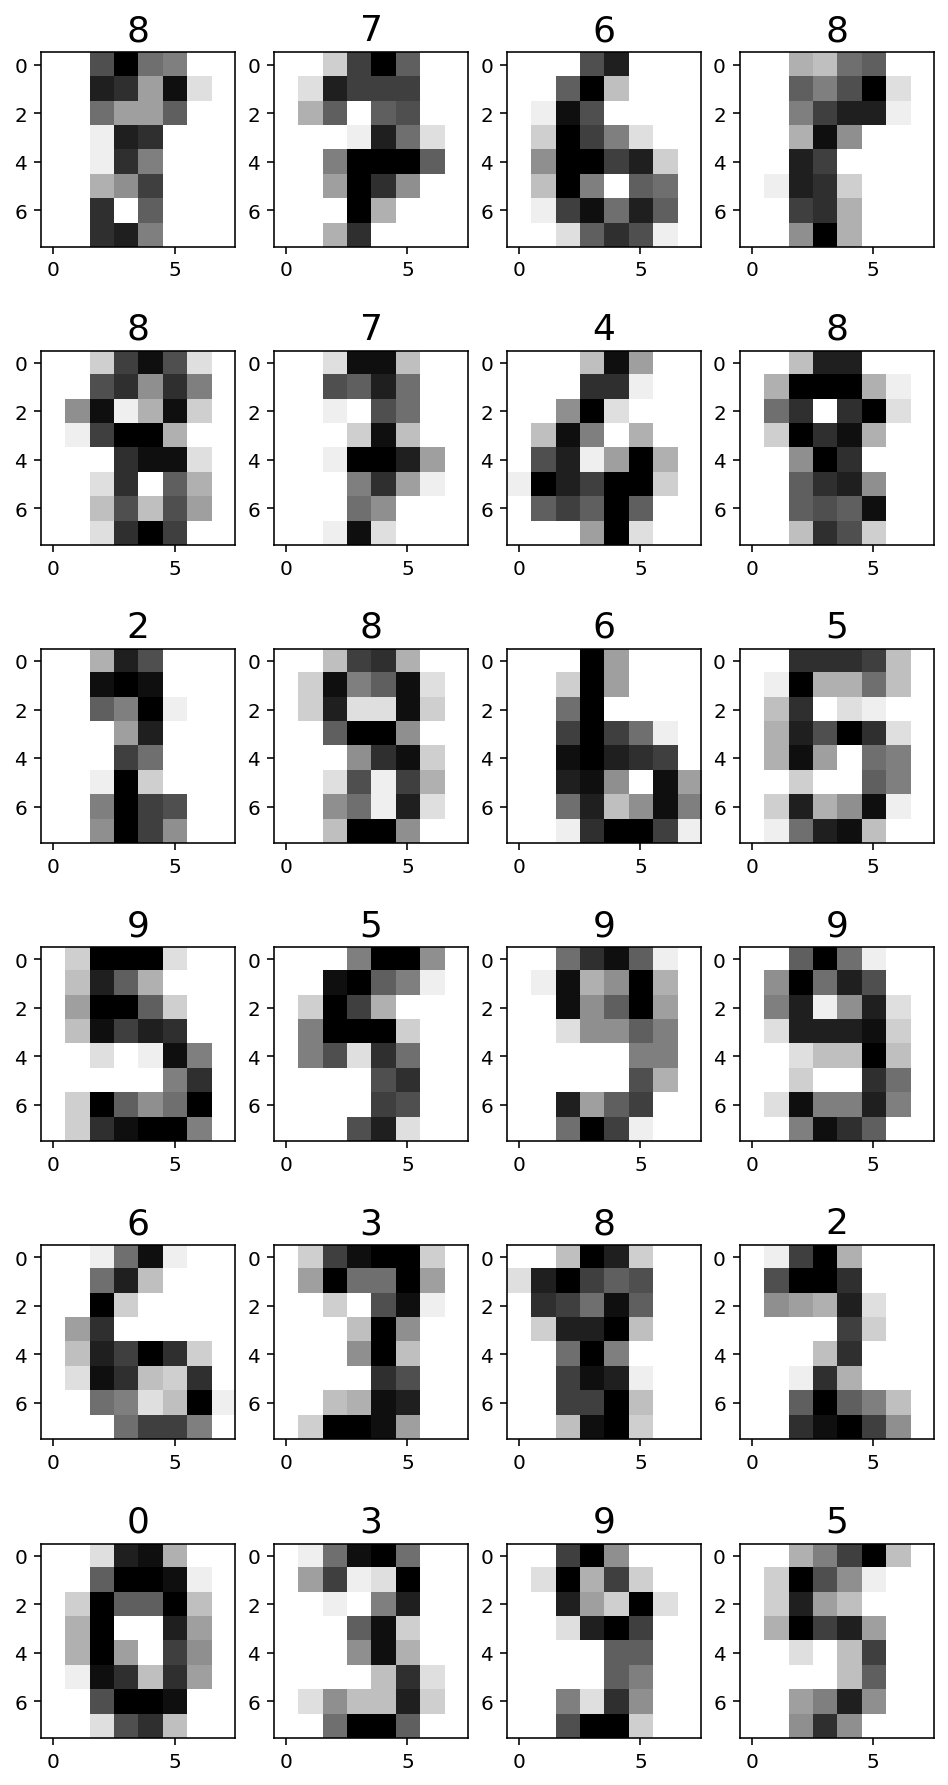

In [16]:
matplotlib.rcParams['figure.figsize'] = (8.0, 16.0)
# chose a model from the array
model =  models[4]
# number of images we want to look
number = 24
# subplot dimensions
subplot_dimension = [6,4]
# plot and predict using the specialised function
plot_random_digits_from_test_data(model, test_data, features, output, number, subplot_dimension)